In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.set_option("display.max_columns", 100)
import os
import geojson
from geojson import Feature, FeatureCollection
import requests
from bs4 import BeautifulSoup
import json
import requests
from datetime import datetime

In [13]:
date_last_updated = pd.datetime(2020, 4, 13, 0, 0)

### National time series, statewise stats and test counts

In [4]:
url = "https://api.covid19india.org/data.json"
r = requests.get(url)
raw_data = r.json()

In [17]:
for key in raw_data:
    print(key)

cases_time_series
statewise
tested


#### Daily cases, deaths, recovered

In [16]:
df = pd.DataFrame(raw_data["cases_time_series"])
df["date"] = df["date"].str.strip()
for i in range(len(df)):
    df.at[i, "date"] = df.iloc[i]["date"] + " 2020"
df["date"] = pd.to_datetime(df["date"])
df.columns = ["daily_confirmed", "daily_deaths", "daily_recovered", "date", "total_confirmed", "total_deaths", "total_recovered"]
df = df[["date", "daily_confirmed", "total_confirmed", "daily_deaths", "total_deaths", "daily_recovered", "total_recovered"]] 

dfr = df.set_index("date").rolling(7).mean().reset_index()[["date", "daily_confirmed", "daily_deaths"]]
dfr.columns = ["date", "rolling_avg_confirmed", "rolling_avg_deaths"]
df = df.set_index("date").join(dfr.set_index("date")).reset_index()

df = df[df["date"] < date_last_updated]
df.to_csv("../data/extracted_data_api/overall_and_daily_cases_deaths.csv", index=False)
df.head(2)

,date,daily_confirmed,total_confirmed,daily_deaths,total_deaths,daily_recovered,total_recovered,rolling_avg_confirmed,rolling_avg_deaths
0,2020-01-30,1,1,0,0,0,0,NaN,NaN
1,2020-01-31,0,1,0,0,0,0,NaN,NaN


#### Statewise

In [23]:
df = pd.DataFrame(raw_data["statewise"])
df = df[["state", "confirmed", "active", "deaths", "recovered", "statecode", "lastupdatedtime"]]
# Exclude total
df = df[df["statecode"]!="TT"]
df["lastupdatedtime"] = pd.to_datetime(df["lastupdatedtime"])
df.to_csv("../data/extracted_data_api/statewise.csv", index=False)
df

,state,confirmed,active,deaths,recovered,statecode,lastupdatedtime
1,Maharashtra,2064,1697,150,217,MH,2020-04-13 10:32:25
2,Delhi,1154,1102,24,28,DL,2020-12-04 20:35:25
3,Tamil Nadu,1173,1104,11,58,TN,2020-04-13 18:35:25
4,Rajasthan,847,715,11,121,RJ,2020-04-13 17:06:18
5,Madhya Pradesh,562,477,44,41,MP,2020-04-13 16:16:24
6,Gujarat,538,465,26,47,GJ,2020-04-13 13:07:42
7,Telangana,531,412,16,103,TG,2020-12-04 21:50:24
8,Uttar Pradesh,483,433,5,45,UP,2020-12-04 20:40:25
9,Andhra Pradesh,439,420,7,12,AP,2020-12-04 19:20:25
10,Kerala,378,178,2,198,KL,2020-04-13 18:17:35


#### ICMR testing

In [28]:
df = pd.DataFrame(raw_data["tested"])
df = df[["updatetimestamp", "totalsamplestested", "totalindividualstested", "totalpositivecases", "samplereportedtoday", "positivecasesfromsamplesreported"]]
df["updatetimestamp"] = pd.to_datetime(df["updatetimestamp"])
df.to_csv("../data/extracted_data_api/icmr_testing.csv", index=False)
df

,updatetimestamp,totalsamplestested,totalindividualstested,totalpositivecases,samplereportedtoday,positivecasesfromsamplesreported
0,2020-03-13 00:00:00,6500,5900,78,,
1,2020-03-18 18:00:00,13125,12235,150,,
2,2020-03-19 10:00:00,13316,12426,168,,
3,2020-03-19 18:00:00,14175,13285,182,,
4,2020-03-20 10:00:00,14376,13486,206,,
5,2020-03-20 18:00:00,15404,14514,236,,
6,2020-03-21 10:00:00,15701,14811,271,,
7,2020-03-21 18:00:00,16911,16021,315,,
8,2020-03-22 10:00:00,16999,16109,341,,
9,2020-03-22 18:00:00,18127,17237,396,,


#### Statewise code-data

In [178]:
df = pd.read_csv("../data/extracted_data_api/statewise.csv")

In [192]:
with open("../data/india_geojson_raw/india.json") as topodata:
    raw_data = json.load(topodata)

data = raw_data
state_list = data["objects"]["india"]["geometries"]

for i in range(len(state_list)):
    state_name = state_list[i]["properties"]["st_nm"]
    df_state = df[df["state"]==state_name].copy()

    if len(df_state)==1:
        data["objects"]["india"]["geometries"][i]["properties"]["confirmed"] = str(df_state["confirmed"].values[0])
        data["objects"]["india"]["geometries"][i]["properties"]["active"] = str(df_state["active"].values[0])
        data["objects"]["india"]["geometries"][i]["properties"]["deaths"] = str(df_state["deaths"].values[0])
        data["objects"]["india"]["geometries"][i]["properties"]["recovered"] = str(df_state["recovered"].values[0])
        
    elif len(df_state)==0:
        print(state_name + " data not found")
    elif len(df_state)>1:
        print(state_name + " more than one data found")
    else:
        print(state_name + " other error")

#with open('../data/india_geojson_data_api/india.json', 'w') as outfile:
with open('../data/extracted_data_api/code_data/india_statewise_map/india.json', 'w') as outfile:
    json.dump(data, outfile)

Hello data not found


## State-district-wise V2 

In [169]:
url = "https://api.covid19india.org/v2/state_district_wise.json"
r = requests.get(url)
raw_data = r.json()

In [170]:
dfs = pd.DataFrame()
for i in range(len(raw_data)):
    state_name = raw_data[i]["state"]
    df = pd.DataFrame(raw_data[i]["districtData"])
    df = df[["district", "confirmed"]]
    df["state"] = state_name
    dfs = dfs.append(df)
dfs.to_csv("../data/extracted_data_api/districtwise_with_unknown.csv", index=False)

## Districtwise from howIndiaLives

In [283]:
df = pd.read_csv("../data/howindialives_districtwise.csv")
df = df[df["District"]!="-"]
df.reset_index(inplace=True)
del df["index"]
df.rename(columns={"State":"state", "District":"district", "Cases":"cases", "Deaths":"deaths"}, inplace=True)
"""
df["cases"] = df["cases"].astype(int)
df["deaths"] = df["deaths"].astype(int)
df["Subcenter"] = df["Subcenter"].astype(int)
df["PHC"] = df["PHC"].astype(int)
df["CHC"] = df["CHC"].astype(int)
df["SDC"] = df["SDC"].astype(int)
df["DH"] = df["DH"].astype(int)
"""
df.to_csv("../data/extracted_data_api/districtwise.csv", index=False)
df

,state,district,cases,deaths,Subcenter,PHC,CHC,SDC,DH
0,Telangana,Adilabad,11,0,126,0,2,0,0
1,Madhya Pradesh,Agar Malwa,1,0,77,6,3,0,1
2,Uttar Pradesh,Agra,90,0,377,42,16,0,2
3,Gujarat,Ahmadabad,266,9,193,83,16,2,0
4,Maharashtra,Ahmadnagar,29,0,529,93,24,2,1
5,Mizoram,Aizawl East District,1,0,57,9,2,0,1
6,Mizoram,Aizawl West District,1,0,37,9,0,1,1
7,Rajasthan,Ajmer,5,0,370,72,22,3,1
8,Maharashtra,Akola,11,0,179,37,5,1,0
9,Kerala,Alappuzha,5,0,366,49,16,6,2


## Data for State scatter plot: Testing vs positive

In [1561]:
##### Statewise confirmed, deaths, recovered #####
"""
url = "https://api.covid19india.org/csv/latest/state_wise_daily.csv"
r = requests.get(url)
f = open('../data/extracted_data_api/statewise_daily_confirmed.csv','w')
f.write(r.text)
f.close()
"""
##### Statewise confirmed #####
url = "http://api.covid19india.org/states_daily_csv/confirmed.csv"
r = requests.get(url)
f = open('../data/extracted_data_api/statewise_daily_confirmed.csv','w')
f.write(r.text)
f.close()

##### Statewise deaths #####
url = "http://api.covid19india.org/states_daily_csv/deceased.csv"
r = requests.get(url)
f = open('../data/extracted_data_api/statewise_daily_deceased.csv','w')
f.write(r.text)
f.close()

##### Statewise recovered #####
url = "http://api.covid19india.org/states_daily_csv/recovered.csv"
r = requests.get(url)
f = open('../data/extracted_data_api/statewise_daily_recovered.csv','w')
f.write(r.text)
f.close()


##### Statewise testing numbers #########
url = "https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv"
r = requests.get(url)
f = open('../data/extracted_data_api/statewise_testing.csv','w')
f.write(r.text)
f.close()

In [1819]:
# Get case count
dfsc = pd.read_csv("../data/extracted_data_api/statewise_daily_confirmed.csv")
del dfsc["TT"], dfsc["Unnamed: 39"]
dfsc["date"] = pd.to_datetime(dfsc["date"]).dt.date
dfsc["date"] = dfsc["date"].apply(lambda x: x.strftime('%Y-%m-%d'))
dfsc = dfsc.set_index("date").cumsum().reset_index()
dfsc = dfsc.transpose()
new_header = dfsc.iloc[0]
dfsc = dfsc[1:]
dfsc.columns = new_header
dfsc.columns = [col+"_cases" for col in dfsc.columns]
dfsc.reset_index(inplace=True)
dfsc.rename(columns={"index":"state"}, inplace=True)


# Get death count
dfsd = pd.read_csv("../data/extracted_data_api/statewise_daily_deceased.csv")
del dfsd["TT"], dfsd["Unnamed: 39"]
dfsd["date"] = pd.to_datetime(dfsd["date"]).dt.date
dfsd["date"] = dfsd["date"].apply(lambda x: x.strftime('%Y-%m-%d'))
dfsd = dfsd.set_index("date").cumsum().reset_index()
dfsd = dfsd.transpose()
new_header = dfsd.iloc[0]
dfsd = dfsd[1:]
dfsd.columns = new_header
dfsd.columns = [col+"_deaths" for col in dfsd.columns]
dfsd.reset_index(inplace=True)
dfsd.rename(columns={"index":"state"}, inplace=True)


#### Join: Cases and deaths
dfs = dfsc.set_index("state").join(dfsd.set_index("state")).reset_index()


# Get tests per million
dfst = pd.read_csv("../data/extracted_data_api/statewise_testing.csv")[["State", "Updated On", "Total Tested"]]
dfst.rename(columns={"State":"state_name", "Total Tested":"tests", "Updated On":"date"}, inplace=True)
dfcc = pd.read_csv("../data/extracted_data_api/code_data/districtwise_case_death_growth_density_withNamesMapped.csv")
dfcc.rename(columns={"state":"state_name"}, inplace=True)
dfsp = dfcc.groupby(["state_name","state_code"]).sum()["population"].reset_index()
dfst = dfst.set_index("state_name").join(dfsp.set_index("state_name"), how="inner").reset_index()
dfst["date"] = pd.to_datetime(dfst["date"], dayfirst=True).dt.date
### Tests per million population
dfst["testspm"] = dfst["tests"]/dfst["population"] * 1e6
dfst["testspm"] = np.round(dfst["testspm"], 2)
del dfst["tests"], dfst["population"]
"""
dftt = pd.read_csv("../data/extracted_data_api/state_codes.csv")
dftt.rename(columns={"state":"state_name"}, inplace=True)
dfst = dfst.set_index("state_name").join(dftt.set_index("state_name")).reset_index()
"""
dfsc = pd.read_csv("../data/extracted_data_api/statewise_daily_confirmed.csv")
dfsc["date"] = pd.to_datetime(dfsc["date"], dayfirst=True).dt.date
start_date = dfsc["date"][0]
end_date = dfsc["date"][len(dfsc)-1]

dfit = pd.DataFrame()
state_list = dfst["state_name"].unique()

for i in range(len(state_list)):
    state_name = state_list[i]
    dft = dfst[dfst["state_name"]==state_name].copy()
    dft.dropna(subset=["testspm"], inplace=True)
    dft.drop_duplicates(inplace=True, subset=["date"], keep="last")
    state_code = dft["state_code"].unique()[0]
    dfi = pd.DataFrame()
    cdt = start_date
    idx=0
    while cdt<=end_date:
        dfi.at[idx, "date"] = cdt
        cdt += timedelta(days=1)
        idx +=1
    dfi = dfi.set_index("date").join(dft.set_index("date")).reset_index()
    dfi["state_name"] = dfi["state_name"].fillna(state_name)
    dfi["state_code"] = dfi["state_code"].fillna(state_code)
    dfi["testspm"] = dfi["testspm"].fillna(method="ffill")
    dfi["testspm"] = dfi["testspm"].fillna(0)

    dfi["date"] = dfi["date"].apply(lambda x: x.strftime('%Y-%m-%d')+"_testspm")
    del dfi["state_name"], dfi["state_code"]
    dfi.rename(columns={"testspm":state_code}, inplace=True)
    dfi = dfi.transpose()
    new_header = dfi.iloc[0]
    dfi = dfi[1:]
    dfi.columns = new_header
    dfi.reset_index(inplace=True)
    dfi.rename(columns={"index":"state"}, inplace=True)
    
    if i==0:
        dfit = dfi.copy()
    else:
        dfit = dfit.append(dfi) #, sort=True)


        
#### Join: tests
dfs = dfs.set_index("state").join(dfit.set_index("state")).reset_index()

        
        
        
## Get growth rate
dfsc = pd.read_csv("../data/extracted_data_api/statewise_daily_confirmed.csv")
del dfsc["TT"], dfsc["Unnamed: 39"]
dfsc["date"] = pd.to_datetime(dfsc["date"]).dt.date
dfsc["date"] = dfsc["date"].apply(lambda x: x.strftime('%Y-%m-%d'))
dfsc = dfsc.set_index("date").cumsum().reset_index()

dfsg = pd.DataFrame()
stidx = 0
for col in dfsc.columns:
    if col not in ["date"]:
        dfss = dfsc[["date", col]].copy()
        dfss
        dfss["prev"] = np.nan
        l = [[0], dfss[col].values[:len(dfss)-1]]
        previous_day_count = [item for sublist in l for item in sublist]
        dfss["prev"] = previous_day_count
        dfss["day_growth"] = (dfss[col] - dfss["prev"])/ dfss["prev"]*100
        dfss["avg_day_growth"] = dfss["day_growth"].rolling(5).mean()
        dfss["avg_day_growth"] = np.round(dfss["avg_day_growth"], 2)
        del dfss[col], dfss["prev"], dfss["day_growth"]
        dfss.rename(columns={"avg_day_growth":col}, inplace=True)
        dfss["date"] = pd.to_datetime(dfss["date"]).dt.date
        dfss["date"] = dfss["date"].apply(lambda x: x.strftime('%Y-%m-%d')+"_growth")
        dfss = dfss.transpose()
        new_header = dfss.iloc[0]
        dfss = dfss[1:]
        dfss.columns = new_header
        dfss.reset_index(inplace=True)
        dfss.rename(columns={"index":"state"}, inplace=True)
        
        if stidx==0:
            dfsg = dfss.copy()
        else:
            dfsg = dfsg.append(dfss)
        stidx+=1

        
#### Join: growth rate
dfs = dfs.set_index("state").join(dfsg.set_index("state")).reset_index()

In [1847]:
dfcc = pd.read_csv("../data/extracted_data_api/code_data/districtwise_case_death_growth_density_withNamesMapped.csv")[["state", "state_code"]]
dfcc.rename(columns={"state":"state_name", "state_code":"state"}, inplace=True)
dfcc.drop_duplicates(subset=["state_name", "state"], inplace=True)

dfss = dfs.set_index("state").join(dfcc[["state","state_name"]].set_index("state"), how="inner").reset_index()
l = [["state"], ["state_name"], dfss.columns[1:len(dfss.columns)-1]]
columns = [item for sublist in l for item in sublist]
dfss = dfss[columns]
dfss.to_csv("../data/extracted_data_api/code_data/state_case_death_testpm_growth.csv", index=False)
dfss

,state,state_name,2020-03-14_cases,2020-03-15_cases,2020-03-16_cases,2020-03-17_cases,2020-03-18_cases,2020-03-19_cases,2020-03-20_cases,2020-03-21_cases,2020-03-22_cases,2020-03-23_cases,2020-03-24_cases,2020-03-25_cases,2020-03-26_cases,2020-03-27_cases,2020-03-28_cases,2020-03-29_cases,2020-03-30_cases,2020-03-31_cases,2020-04-01_cases,2020-04-02_cases,2020-04-03_cases,2020-04-04_cases,2020-04-05_cases,2020-04-06_cases,2020-04-07_cases,2020-04-08_cases,2020-04-09_cases,2020-04-10_cases,2020-04-11_cases,2020-04-12_cases,2020-04-13_cases,2020-04-14_cases,2020-04-15_cases,2020-04-16_cases,2020-04-17_cases,2020-04-18_cases,2020-04-19_cases,2020-04-20_cases,2020-04-21_cases,2020-03-14_deaths,2020-03-15_deaths,2020-03-16_deaths,2020-03-17_deaths,2020-03-18_deaths,2020-03-19_deaths,2020-03-20_deaths,2020-03-21_deaths,2020-03-22_deaths,...,2020-04-11_testspm,2020-04-12_testspm,2020-04-13_testspm,2020-04-14_testspm,2020-04-15_testspm,2020-04-16_testspm,2020-04-17_testspm,2020-04-18_testspm,2020-04-19_testspm,2020-04-20_testspm,2020-04-21_testspm,2020-03-14_growth,2020-03-15_growth,2020-03-16_growth,2020-03-17_growth,2020-03-18_growth,2020-03-19_growth,2020-03-20_growth,2020-03-21_growth,2020-03-22_growth,2020-03-23_growth,2020-03-24_growth,2020-03-25_growth,2020-03-26_growth,2020-03-27_growth,2020-03-28_growth,2020-03-29_growth,2020-03-30_growth,2020-03-31_growth,2020-04-01_growth,2020-04-02_growth,2020-04-03_growth,2020-04-04_growth,2020-04-05_growth,2020-04-06_growth,2020-04-07_growth,2020-04-08_growth,2020-04-09_growth,2020-04-10_growth,2020-04-11_growth,2020-04-12_growth,2020-04-13_growth,2020-04-14_growth,2020-04-15_growth,2020-04-16_growth,2020-04-17_growth,2020-04-18_growth,2020-04-19_growth,2020-04-20_growth,2020-04-21_growth
0,AN,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,0,0,1,6,9,9,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,12,14,15,16,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3686.47,3686.47,3686.47,5307.67,5307.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.22,12.22,2.22,2.22,0,0,0,0,2,2,2,2,2,0,0,0,0,1.82,5.15,6.58,7.91,9.16
1,AP,Andhra Pradesh,1,1,1,1,1,3,3,5,6,7,8,10,11,13,19,21,23,44,111,149,164,192,256,303,314,348,363,381,405,420,439,484,525,534,572,603,647,722,757,0,0,0,0,0,0,0,0,0,...,140.91,140.91,177.3,212.74,235.18,409.79,409.79,434.4,545.94,622.39,724.1,NaN,NaN,NaN,NaN,NaN,40,40,53.33,57.33,60.67,23.52,28.52,17.19,16.83,22.72,21.97,18.88,35.14,61.96,59.57,59.48,60.99,49.4,22.61,16.49,16.64,14.09,8.42,6.01,6.02,4.76,5.95,6.65,5.73,6.42,6.59,6,6.63,7.25
2,AR,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,...,123.11,123.11,123.11,167.33,167.33,167.33,216.93,232.47,232.47,262.35,271.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AS,Assam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,16,23,26,26,26,28,28,29,29,29,30,32,33,33,35,35,35,35,35,35,0,0,0,0,0,0,0,0,0,...,96.6,100.68,100.68,112,115.92,131.8,135.9,141.16,156.08,164.01,176.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.36,11.36,12.9,4.15,2.25,2.25,2.25,1.4,2.74,2.65,2.65,3.86,3.17,1.84,1.21,1.21,0
4,BR,Bihar,0,0,0,0,0,0,0,0,2,3,3,4,7,9,11,15,15,21,24,29,31,32,32,32,38,39,58,60,64,64,66,66,72,83,85,86,96,113,126,0,0,0,0,0,0,0,0,1,...,58.78,63.04,68.31,72.67,77.71,83.19,89.21,95.27,101.05,106.45,112.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.38,31.83,39.1,32.43,25.43,22.57,22.3,16.4,17.05,9.05,6.19,5.77,4.92,14.02,14.71,16.04,12.29,12.39,2.65,3.78,5.5,5.98,5.59,7.92,9.64,8.89
5,CH,Chandigarh,0,0,0,0,0,1,5,5,6,7,7,7,7,8,8,8,13,15,17,18,18,18,18,18,18,18,18,19,19,21,21,21,21,21,21,23,26,26,27,0,0,0,0,0,0,0,0,0,...,250.13,264.34,280.45,292.77,300.35,319.3,339.19,360.98,407.41,429.2,470.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.33,7.33,7.33,6.19,2.86,2.86,15.36,18.43,18.24,19.42,19.42,6.92,3.84,1.18,0,0,0,1.11,1.11,3.2

#### Districtwise code-data

In [1208]:
state_name_mapping = {'odisha':'Odisha', 'telangana':'Telangana', 'meghalaya':'Meghalaya','karnataka':'Karnataka',
                     'haryana':'Haryana','bihar':'Bihar','andhrapradesh':'Andhra Pradesh','jammukashmir':'Jammu and Kashmir',
                     'westbengal':'West Bengal','kerala':'Kerala','chhattisgarh':'Chhattisgarh','andamannicobarislands':'Andaman and Nicobar Islands',
                     'jharkhand':'Jharkhand','ladakh':'Ladakh','uttarpradesh':'Uttar Pradesh','mizoram':'Mizoram','lakshadweep':'Lakshadweep',
                     'nagaland':'Nagaland','tamilnadu':'Tamil Nadu','dadranagarhaveli':'Dadra and Nagar Haveli','delhi':'Delhi',
                     'puducherry':'Puducherry','madhyapradesh':'Madhya Pradesh','arunachalpradesh':'Arunachal Pradesh','uttarakhand':'Uttarakhand',
                     'manipur':'Manipur','tripura':'Tripura','gujarat':'Gujarat','goa':'Goa','assam':'Assam','maharashtra':'Maharashtra',
                     'punjab':'Punjab','sikkim':'Sikkim','rajasthan':'Rajasthan','chandigarh':'Chandigarh','himachalpradesh':'Himachal Pradesh'}

state_name_mapping_howindialives = {"Jammu & Kashmir":"Jammu and Kashmir",
                                    "A& N Islands":"Andaman and Nicobar Islands",
                                    "D & N Haveli":"Dadra and Nagar Haveli"}

district_name_mapping = {"Jagitial":"Jagtial", "Jangoan":"Jangaon", "Kumuram Bheem Asifabad":"Komaram Bheem Asifabad",
                         "Mahabubnagar": "Mahbubnagar", "Ranga Reddy": "Rangareddy", "Yadadri Bhuvanagiri":"Yadadri Bhongir",
                         "Jayashankar": "Jayashankar Bhupalapally",
                         "West Khasi Hills":"West khasi Hills", "East Jaintia Hills":"East Jainta Hills",
                        "Kalaburagi":"Gulbarga", "Belagavi":"Belgaum", "Bagalkote":"Bagalkot", "Ballari":"Bellary",
                        "Shivamogga":"Shimoga", "Chikkamagaluru":"Chikmagalur", "Bengaluru Rural":"Bangalore Rural",
                        "Bengaluru":"Bangalore", "Chamarajanagara":"Chamarajanagar", "Tumakuru":"Tumkur", "Mysuru":"Mysore","Vijayapura":"Bijapur",
                        "Gurugram":"Gurgaon", "Mahendragarh":"Narnaul","Charki Dadri":"Ch-Dadri",
                        "West Champaran": "Pashchim Champaran", "East Champaran":"Purba Champaran", "Kaimur Bhabhua":"Kaimur (Bhabua)", "Kaimur Bhabua":"Kaimur (Bhabua)",
                        "S.P.S. Nellore":"Nellore", "Chittoor":"chittoor",
                        "South 24 Parganas":"South Twenty Four Parganas", "Medinipur West":"Paschim Medinipur", "Medinipur East":"Purba Medinipur",
                        "Darjeeling":"Darjiling", "Purulia":"Puruliya", "North 24 Parganas":"North Twenty Four Parganas", "Hooghly":"Hugli",
                        "Howrah":"Haora", "Cooch Behar":"Koch Bihar",
                        "Gariaband":"Gariyaband", "Kabeerdham":"Kawardha", "Janjgir Champa":"Janjgir - Champa", "Bametara":"Bemetara",
                        "Baloda Bazar":"Balodabazar",
                        "North and Middle Andaman":"North & Middle Andman", "South Andaman":"South Andman","Nicobars":"Nicobar",
                        "Saraikela-kharsawan":"Saraikela-Kharsawan",
                        "Leh":"Leh(Ladakh)",
                        "Amroha":"J P Nagar (Amroha)", "Kheri":"Lakhimpur Kheri", "Kasganj":"Kanshiram Nagar", "Prayagraj":"Allahabad",
                        "Bhadohi":"Sant Ravidas Nagar (Bhadohi)", "Amethi":"C S M Nagar (Amethi)",
                        "Thoothukudi":"Thoothukkudi","Dadra and Nagar Haveli":"Uni District UT", 
                        "Khargone":"Khargone (West Nimar)", "Khandwa":"Khandwa (East Nimar)", "Ashoknagar":"Ashok Nagar",
                        "Kra Daadi":"Kra daadi", "Lower Dibang Valley":"Lower Dibang valley", "Upper Dibang Valley":"Dibang Valley",
                        "Haridwar":"Hardwar", "Noney":"None", "Pherzawl":"Pherjawl", "Sipahijala":"Sepahijala District","Gomati":"Gomati District",
                        "Khowai":"Khowai District", "Unokoti":"Unakoti District", "The Dangs":"Dang", "Chota Udaipur":"Chhota Udepur",
                        "Aravalli":"Arvalli",
                        "S.A.S. Nagar":"Mohali", "Sri Muktsar Sahib":"Muktsar","Jalore":"Jalor",
                        "Jhunjhunu":"Jhunjhunun", "Lahul and Spiti":"Lahul & Spiti","North  District":"North District"
                        }


district_name_resolution = ["Aurangabad", "Bijapur", "Raigarh", "Bilaspur", "Balrampur", "Hamirpur", "Pratapgarh"]

"""
district_name_unmapped_old = ["Muzaffarabad", "Mirpur", "Shi Yomi", "Pakke Kessang", "Pakke-Kessang", "Lepa Rada", "Pauri Garhwal",
                         "Charaideo", "Majuli", "Biswanath", "Hojai", "South Salmara Mancachar",
                         "Shahid Bhagat Singh Nagar", "West Karbi Anglong"]
"""

district_name_wiki_mapping = {"Sri Potti Sriramulu Nellore":"Nellore", "Kadapa":"Y.S.R.",
    "Dantewada":"Dakshin Bastar Dantewada", "Janjgir-Champa":"Janjgir - Champa","Kabirdham":"Kawardha", "Kanker":"Uttar Bastar Kanker",
    "Ahmedabad":"Ahmadabad", "Banaskantha": "Banas Kantha", "Dahod":"Dohad", "Devbhoomi Dwarka":"Devbhumi Dwarka",
    "Kutch":"Kachchh", "Mehsana":"Mahesana", "Panchmahal":"Panch Mahals", "Sabarkantha":"Sabar Kantha",
    "Charkhi Dadri":"Ch-Dadri", "Hissar":"Hisar", "Yamuna Nagar":"Yamunanagar",
    "Lahaul and Spiti":"Lahul & Spiti",
    "East Singhbhum":"Purbi Singhbhum", "West Singhbhum":"Pashchimi Singhbhum", "Hazaribag":"Hazaribagh", "Koderma":"Kodarma", "Seraikela Kharsawan":"Saraikela-Kharsawan",
    "Bangalore Urban":"Bangalore","Chamarajnagar":"Chamarajanagar","Chikkaballapur":"Chikkaballapura",
    "Narsinghpur":"Narsimhapur", "Ahmednagar":"Ahmadnagar", "Beed":"Bid", "Buldhana":"Buldana", "Gondia":"Gondiya", "Mumbai City":"Mumbai","Mumbai suburban":"Mumbai Suburban",
    "Raigad":"Raigarh (Maharashtra)","Ri Bhoi":"Ribhoi", "Angul":"Anugul", "Boudh (Bauda)":"Baudh", "Bargarh (Baragarh)":"Bargarh", "Balasore":"Baleshwar",
    "Debagarh (Deogarh)":"Debagarh", "Jajpur":"Jajapur", "Jagatsinghpur":"Jagatsinghapur","Kendujhar (Keonjhar)":"Kendujhar", "Nabarangpur":"Nabarangapur", "Subarnapur (Sonepur)":"Subarnapur",
    "Chittorgarh":"Chittaurgarh", "Dholpur":"Dhaulpur", "East Sikkim":"East District", "North Sikkim":"North District", "South Sikkim":"South District", "West Sikkim":"West District",
    "Kanchipuram":"Kancheepuram", "Kanyakumari":"Kanniyakumari", "Nilgiris":"The Nilgiris", "Tirupur":"Tiruppur",
    "Tiruvallur":"Thiruvallur","Tiruvarur":"Thiruvarur", "Komaram Bheem":"Komaram Bheem Asifabad","Jayashankar Bhupalpally":"Jayashankar Bhupalapally", "Medchal-Malkajgiri":"Medchal Malkajgiri",
    "Sepahijala":"Sepahijala District", "Bagpat":"Baghpat", "Barabanki":"Bara Banki", "Gautam Buddh Nagar":"Gautam Buddha Nagar",
    "Maharajganj":"Mahrajganj", "Raebareli":"Rae Bareli", "Shravasti":"Shrawasti","Bandipora":"Bandipore", "Baramulla":"Baramula",
    "Poonch":"Punch", "Shopian":"Shupiyan","Mahé":"Mahe","Pondicherry":"Puducherry",
    "Kaimur":"Kaimur (Bhabua)", "Sahibzada Ajit Singh Nagar":"Mohali","Jalore":"Jalor"
}

district_name_unmapped = ["Muzaffarabad", "Mirpur", "Shi Yomi", "Pakke Kessang", "Pakke-Kessang", "Lepa Rada", "Pauri Garhwal",
                         "Charaideo", "Majuli", "Biswanath", "Hojai", "South Salmara Mancachar", "South Salmara", "Bishwanath",
                         "Shahid Bhagat Singh Nagar", "West Karbi Anglong",
                         "Gaurela-Pendra-Marwahi", "Chachaura-Binaganj", "Maihar", "Niwari", "Nagda", "Noklak",
                         "Sahibzada Ajit Singh Nagar", "Jalore", "Chengalpattu", "Kallakurichi", "Mayiladuthurai",
                         "Ranipet","Tenkasi","Tirupattur", "Daman", "Diu", "Niwari"]

In [895]:
def resolve_district_name(state_name, district_name):
    if ((state_name=="bihar") and (district_name=="Aurangabad")):
        district_name = "Aurangabad (Bihar)"
    if ((state_name=="Bihar") and (district_name=="Aurangabad")):
        district_name = "Aurangabad (Bihar)"
    if ((state_name=="maharashtra") and (district_name=="Aurangabad")):
        district_name = "Aurangabad (Maharashtra)"
    if ((state_name=="Maharashtra") and (district_name=="Aurangabad")):
        district_name = "Aurangabad (Maharashtra)"

    if ((state_name=="karnataka") and (district_name=="Bijapur")):
        district_name = "Bijapur (Karnataka)"
    if ((state_name=="Karnataka") and (district_name=="Bijapur")):
        district_name = "Bijapur (Karnataka)"
    if ((state_name=="chhattisgarh") and (district_name=="Bijapur")):
        district_name = "Bijapur (Chhattisgarh)"
    if ((state_name=="Chhattisgarh") and (district_name=="Bijapur")):
        district_name = "Bijapur (Chhattisgarh)"

    if ((state_name=="maharashtra") and (district_name=="Raigarh")):
        district_name = "Raigarh (Maharashtra)"
    if ((state_name=="Maharashtra") and (district_name=="Raigarh")):
        district_name = "Raigarh (Maharashtra)"
    if ((state_name=="chhattisgarh") and (district_name=="Raigarh")):
        district_name = "Raigarh (Chhattisgarh)"
    if ((state_name=="Chhattisgarh") and (district_name=="Raigarh")):
        district_name = "Raigarh (Chhattisgarh)"
    
    if ((state_name=="himachalpradesh") and (district_name=="Bilaspur")):
        district_name = "Bilaspur (Himachal Pradesh)"
    if ((state_name=="Himachal Pradesh") and (district_name=="Bilaspur")):
        district_name = "Bilaspur (Himachal Pradesh)"
    if ((state_name=="chhattisgarh") and (district_name=="Bilaspur")):
        district_name = "Bilaspur (Chhattisgarh)"
    if ((state_name=="Chhattisgarh") and (district_name=="Bilaspur")):
        district_name = "Bilaspur (Chhattisgarh)"
    
    if ((state_name=="uttarpradesh") and (district_name=="Balrampur")):
        district_name = "Balrampur (Uttar Pradesh)"
    if ((state_name=="Uttar Pradesh") and (district_name=="Balrampur")):
        district_name = "Balrampur (Uttar Pradesh)"
    if ((state_name=="chhattisgarh") and (district_name=="Balrampur")):
        district_name = "Balrampur (Chhattisgarh)"
    if ((state_name=="Chhattisgarh") and (district_name=="Balrampur")):
        district_name = "Balrampur (Chhattisgarh)"

    if ((state_name=="uttarpradesh") and (district_name=="Hamirpur")):
        district_name = "Hamirpur (Uttar Pradesh)"
    if ((state_name=="Uttar Pradesh") and (district_name=="Hamirpur")):
        district_name = "Hamirpur (Uttar Pradesh)"
    if ((state_name=="himachalpradesh") and (district_name=="Hamirpur")):
        district_name = "Hamirpur (Himachal Pradesh)"
    if ((state_name=="Himachal Pradesh") and (district_name=="Hamirpur")):
        district_name = "Hamirpur (Himachal Pradesh)"
    
    if ((state_name=="uttarpradesh") and (district_name=="Pratapgarh")):
        district_name = "Pratapgarh (Uttar Pradesh)"
    if ((state_name=="Uttar Pradesh") and (district_name=="Pratapgarh")):
        district_name = "Pratapgarh (Uttar Pradesh)"
    if ((state_name=="rajasthan") and (district_name=="Pratapgarh")):
        district_name = "Pratapgarh (Rajasthan)"
    if ((state_name=="Rajasthan") and (district_name=="Pratapgarh")):
        district_name = "Pratapgarh (Rajasthan)"


    return district_name
  

In [478]:
"""
df = pd.read_csv("../data/extracted_data_api/districtwise.csv")


df.at[((df["state"]=="Bihar") & (df["district"]=="Aurangabad")), "district"] = "Aurangabad (Bihar)"
df.at[((df["state"]=="Maharashtra") & (df["district"]=="Aurangabad")), "district"] = "Aurangabad (Maharashtra)"

df.at[((df["state"]=="Karnataka") & (df["district"]=="Bijapur")), "district"] = "Bijapur (Karnataka)"
df.at[((df["state"]=="Chhattisgarh") & (df["district"]=="Bijapur")), "district"] = "Bijapur (Chhattisgarh)"

df.at[((df["state"]=="Maharashtra") & (df["district"]=="Raigarh")), "district"] = "Raigarh (Maharashtra)"
df.at[((df["state"]=="Chhattisgarh") & (df["district"]=="Raigarh")), "district"] = "Raigarh (Chhattisgarh)"

df.at[((df["state"]=="Himachal Pradesh") & (df["district"]=="Bilaspur")), "district"] = "Bilaspur (Himachal Pradesh)"
df.at[((df["state"]=="Chhattisgarh") & (df["district"]=="Bilaspur")), "district"] = "Bilaspur (Chhattisgarh)"

df.at[((df["state"]=="Uttar Pradesh") & (df["district"]=="Balrampur")), "district"] = "Balrampur (Uttar Pradesh)"
df.at[((df["state"]=="Chhattisgarh") & (df["district"]=="Balrampur")), "district"] = "Balrampur (Chhattisgarh)"

df.at[((df["state"]=="Himachal Pradesh") & (df["district"]=="Hamirpur")), "district"] = "Hamirpur (Himachal Pradesh)"
df.at[((df["state"]=="Uttar Pradesh") & (df["district"]=="Hamirpur")), "district"] = "Hamirpur (Uttar Pradesh)"

df.at[((df["state"]=="Rajasthan") & (df["district"]=="Pratapgarh")), "district"] = "Pratapgarh (Rajasthan)"
df.at[((df["state"]=="Uttar Pradesh") & (df["district"]=="Pratapgarh")), "district"] = "Pratapgarh (Uttar Pradesh)"



### Special Cases
####### Mizoram: Aizawl #########
dfsp = df[(df["district"]=="Aizawl East District") | (df["district"]=="Aizawl West District")].copy()
dfn = pd.DataFrame(columns=dfsp.columns)
dfsp["cases"] = dfsp["cases"].astype(int)
dfsp["deaths"] = dfsp["deaths"].astype(int)
dfsp["Subcenter"] = dfsp["Subcenter"].astype(int)
dfsp["PHC"] = dfsp["PHC"].astype(int)
dfsp["CHC"] = dfsp["CHC"].astype(int)
dfsp["SDC"] = dfsp["SDC"].astype(int)
dfsp["DH"] = dfsp["DH"].astype(int)

dfn.at[0, "state"] = "Mizoram"
dfn.at[0, "district"] = "Aizawl"
dfn.at[0, "cases"] = dfsp.sum()["cases"]
dfn.at[0, "deaths"] = dfsp.sum()["deaths"]
dfn.at[0, "Subcenter"] = dfsp.sum()["Subcenter"]
dfn.at[0, "PHC"] = dfsp.sum()["PHC"]
dfn.at[0, "CHC"] = dfsp.sum()["CHC"]
dfn.at[0, "SDC"] = dfsp.sum()["SDC"]
dfn.at[0, "DH"] = dfsp.sum()["DH"]
dfn    

df = df[df["district"]!="Aizawl East District"]
df = df[df["district"]!="Aizawl West District"]
df = df.append(dfn, ignore_index=True)


########## Delhi ##########
dfsp = df[df["state"]=="Delhi"].copy()
for d in range(len(dfsp)):
    district = dfsp.iloc[d]["district"]
    if (district != "New Delhi") and (district != "Shahdara"):
        df.at[((df["district"]==district)&(df["state"]=="Delhi")), "district"] = district + " Delhi"

########## Sikkim ##########
dfsp = df[df["state"]=="Sikkim"].copy()
for d in range(len(dfsp)):
    district = dfsp.iloc[d]["district"]
    df.at[((df["district"]==district)&(df["state"]=="Sikkim")), "district"] = district + " District"

df.to_csv("../data/extracted_data_api/districtwise.csv", index=False)
"""

### Hotspot map: Generate topojson data for districtwise cases, deaths, growth, density

In [1216]:
### Combined data: cases, deaths, growth_rate, cases_per_100000
df = pd.read_csv("../data/extracted_data_api/code_data/districtwise_case_death_growth_density_withNamesMapped.csv")

state_name_list = []

for fp in os.listdir("../data/state_geojson_raw/"):
    if not fp.startswith(".") and fp.endswith(".json"):
        state_name = fp.split(".")[0]
        state_name_mapped = state_name_mapping[state_name]
        state_name_list.append(state_name)
        print(state_name)

        with open("../data/state_geojson_raw/"+fp) as topodata:
            raw_data = json.load(topodata)

        data = raw_data
        district_list = data["objects"][state_name+"_district"]["geometries"]
        
        if state_name=="tamilnadu":
            data["transform"]["scale"] = [0.0006973698971092601, 0.0006462543480830687]
            data["transform"]["translate"] = [76.20310065122152, 8.107847033856163]
        
        for i in range(len(district_list)):
            district_name = data["objects"][state_name+"_district"]["geometries"][i]["properties"]["district"]
            if district_name in district_name_mapping:
                district_name_mapped = district_name_mapping[district_name]
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["district"] = district_name_mapped
                district_name = district_name_mapped
                
            if district_name in district_name_resolution:
                district_name_resolved = resolve_district_name(state_name, district_name)
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["district"] = district_name_resolved
                district_name = district_name_resolved
                
            ## District name not found
            if district_name in district_name_unmapped:
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["cases"] = str(-1)
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["deaths"] = str(-1)
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["current_case_growth_rate"] = str(-1)
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["case_density"] = str(-1)
            else:
                df_district = df[df["district"]==district_name].copy()

                if len(df_district)==1:
                    data["objects"][state_name+"_district"]["geometries"][i]["properties"]["cases"] = str(df_district["cases"].values[0])
                    data["objects"][state_name+"_district"]["geometries"][i]["properties"]["deaths"] = str(df_district["deaths"].values[0])
                    data["objects"][state_name+"_district"]["geometries"][i]["properties"]["current_case_growth_rate"] = str(df_district["current_avg_growth_rate"].values[0])
                    data["objects"][state_name+"_district"]["geometries"][i]["properties"]["case_density"] = str(df_district["cases_per_lakh"].values[0])
                elif len(df_district)==0:
                    print(district_name + " data not found")
                elif len(df_district)>1:
                    print(district_name + " more than one data found")
                else:
                    print(district_name + " other error")
                    
        with open('../data/extracted_data_api/code_data/india_districtwise_map_case_death_growth_density/'+state_name+'.json', 'w') as outfile:
            json.dump(data, outfile)


odisha
telangana
meghalaya
karnataka
haryana
bihar
andhrapradesh
jammukashmir
westbengal
kerala
chhattisgarh
andamannicobarislands
jharkhand
ladakh
uttarpradesh
mizoram
lakshadweep
nagaland
tamilnadu
dadranagarhaveli
delhi
puducherry
madhyapradesh
arunachalpradesh
uttarakhand
manipur
tripura
gujarat
goa
assam
maharashtra
punjab
sikkim
rajasthan
chandigarh
himachalpradesh


## Travel history

In [51]:
url = "https://api.covid19india.org/travel_history.json"
r = requests.get(url)
raw_data = r.json()

In [130]:
def process_tmst(tmst):
    tmst_split = tmst.split(" ")
    tmst_date = tmst_split[0].replace("03/082020", "03/08/2020").replace(":","/").replace(".","/")
    tmst_time = ""
    tmst_ampm = ""

    if len(tmst_split)>=2:
        tmst_time = tmst_split[1].replace(".",":")
        if len(tmst_split)==3:
            tmst_ampm = tmst_split[2]

    tmst_processed = tmst_date + " " + tmst_time + " " + tmst_ampm
    return tmst_processed

In [140]:
df = pd.DataFrame(raw_data["travel_history"])
df.rename(columns={"_cn6ca":"sl_no"}, inplace=True)
df = df[["sl_no", "pid", "latlong", "address", "timefrom", "timeto", "type", "placename", "modeoftravel"]]

for i in range(len(df)):
    if df.iloc[i]["latlong"]=="":
        df.at[i, "lat"] = np.nan
        df.at[i, "long"] = np.nan
    else:
        df.at[i, "lat"] = df.iloc[i]["latlong"].split(",")[0]
        df.at[i, "long"] = df.iloc[i]["latlong"].split(",")[0]

    if len(df.iloc[i]["timefrom"].strip())>0:
        df.at[i, "timefrom"] = process_tmst(df.iloc[i]["timefrom"])
    if len(df.iloc[i]["timeto"].strip())>0:
        df.at[i, "timeto"] = process_tmst(df.iloc[i]["timeto"])

df = df[["sl_no", "pid", "lat", "long", "address", "timefrom", "timeto", "type", "placename", "modeoftravel"]]
df["timefrom"] = pd.to_datetime(df["timefrom"])
df["timeto"] = pd.to_datetime(df["timeto"])

df.to_csv("../data/extracted_data_api/travel_history.csv", index=False)

## Deaths and recoveries

In [168]:
url = "https://api.covid19india.org/deaths_recoveries.json"
r = requests.get(url)
raw_data = r.json()

In [150]:
df = pd.DataFrame(raw_data["deaths_recoveries"])
df.rename(columns={"agebracket":"age", "deceased":"status"}, inplace=True)
df = df[["slno", "age", "gender", "city", "date", "status", "district", "state", "statecode", "notes"]]
df = df[df["state"]!=""]
df.to_csv("../data/extracted_data_api/death_recovered.csv", index=False)

In [165]:
df = pd.read_csv("../data/extracted_data_api/death_recovered.csv")
len(df[df["status"]=="Deceased"])

358

## Raw data

In [151]:
url = "https://api.covid19india.org/raw_data.json"
r = requests.get(url)
raw_data = r.json()

In [163]:
df = pd.DataFrame(raw_data["raw_data"])
df.rename(columns={"contractedfromwhichpatientsuspected":"contracted_from", "currentstatus":"status",
                   "detectedcity":"city", "detecteddistrict":"district", "detectedstate": "state",
                   "dateannounced":"date", "typeoftransmission":"transmission_type", "agebracket":"age",
                   "statepatientnumber": "state_pid", "patientnumber":"pid"}, inplace=True)
df = df[["pid", "date", "age", "gender", "city", "district", "state", "status", "statecode",  "state_pid", "transmission_type", "notes"]]
df.to_csv("../data/extracted_data_api/raw_data.csv", index=False)
df

,pid,date,age,gender,city,district,state,status,statecode,state_pid,transmission_type,notes
0,1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,KL,KL-TS-P1,Imported,Travelled from Wuhan
1,2,02/02/2020,,,Alappuzha,Alappuzha,Kerala,Recovered,KL,KL-AL-P1,Imported,Travelled from Wuhan
2,3,03/02/2020,,,Kasaragod,Kasaragod,Kerala,Recovered,KL,KL-KS-P1,Imported,Travelled from Wuhan
3,4,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,DL,DL-P1,Imported,"Travelled from Austria, Italy"
4,5,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,TG,TS-P1,Imported,"Travelled from Dubai to Bangalore on 20th Feb,..."
5,6,03/03/2020,69,M,Jaipur,Italians*,Rajasthan,Recovered,RJ,,Imported,Travelled from Italy
6,7,04/03/2020,55,,Gurugram,Italians*,Haryana,Recovered,HR,,Imported,Travelled from Italy
7,8,04/03/2020,55,,Gurugram,Italians*,Haryana,Recovered,HR,,Imported,Travelled from Italy
8,9,04/03/2020,55,,Gurugram,Italians*,Haryana,Recovered,HR,,Imported,Travelled from Italy
9,10,04/03/2020,55,,Gurugram,Italians*,Haryana,Recovered,HR,,Imported,Travelled from Italy


#### Districtwise datewise

In [530]:
df = pd.read_csv("../data/extracted_data_api/raw_data.csv")
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df = df[["date", "district", "state"]]
df["count"] = 1
### Combine all Delhi cases under one district with name "Delhi"
df.at[df["state"]=="Delhi", "district"] = "Delhi"

### Remove cases marked as Italians*
df = df[df["district"]!="Italians*"]
df.sort_values("date", inplace=True)

dfts = df.groupby(["state", "district", "date"]).count().reset_index()
dfts.head(2)

,state,district,date,count
0,Andaman and Nicobar Islands,North and Middle Andaman,2020-03-27,1
1,Andaman and Nicobar Islands,South Andaman,2020-03-26,1


In [557]:
### District list
dfd = pd.read_csv("../data/extracted_data/district_list.csv")[["district", "state"]]
dfd.at[dfd["state"]=="Delhi", "district"] = "Delhi"
state_list = dfd["state"].unique()
state_list

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman And Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [558]:
### Get time series of cases for each district
start_date = pd.to_datetime(df.head(1)["date"].values[0])
end_date = pd.to_datetime(df.tail(1)["date"].values[0])

dfdd = pd.DataFrame()
idx = 0
dc = 0
for sid in range(len(state_list)):
    state_name = state_list[sid]
    print(state_name)
    
    state_district_list = dfd[dfd["state"]==state_name]["district"].unique()
    dc += len(state_district_list)
    for did in range(len(state_district_list)):
        district_name = state_district_list[did]
        
        d = start_date
        while (d <= end_date):
            dfdd.at[idx, "state"] = state_name
            dfdd.at[idx, "district"] = district_name
            dfdd.at[idx, "date"] = d
            
            dfc = dfts[(dfts["state"]==state_name) & (dfts["district"]==district_name) & (dfts["date"]==d)]
            if len(dfc)==0:
                dfdd.at[idx, "count"] = 0
            elif len(dfc)==1:
                dfdd.at[idx, "count"] = dfc["count"].values[0]
            else:
                print("Error: " + state_name + " " + district_name + " " + date)
            
            idx += 1
            d += timedelta(days=1)
dfdd.to_csv("../data/extracted_data_api/districtwise_time_series.csv", index=False)

Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli
Daman And Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttar Pradesh
Uttarakhand
West Bengal


#### District growth rate averaged over previous week  (with name mapping)

In [1547]:
max_growth_rate_nan_cutoff = 150
init_date = pd.datetime(2020, 3, 15)
num_days_rolling_avg = 7

dfdd = pd.read_csv("../data/extracted_data_api/districtwise_time_series.csv")
dfdd["date"] = pd.to_datetime(dfdd["date"])
state_list = dfdd["state"].unique()
district_list = dfdd["district"].unique()

latest_date = pd.to_datetime(dfdd.sort_values("date").tail(1)["date"].values[0])
two_weeks_past_date = latest_date - timedelta(days=14)

#dfdc = dfdd.groupby(["state", "district"]).sum()["count"].reset_index()
#dfdc = dfdc[dfdc["count"]>min_case_count]
#district_list_with_min_cases = dfdc["district"].unique()

# State code
dfsc = pd.read_csv("../data/extracted_data/state_codes.csv")

# District population
dfwdp = pd.read_csv("../data/wiki_scrape/district_population_wiki_withNameMapped.csv")

ridx = 0
cidx = 0
cpidx = 0
dfrc = pd.DataFrame() ## Current growth rate for all districts ##with min_case_count
dfcc = pd.DataFrame() ## Current Growth rate for all districts
dfrg = pd.DataFrame() ## Latest two weeks Growth rate for all districts
dfcp = pd.DataFrame() ## Latest two weeks cases/population for all districts

state_list = ["Rajasthan"]
for sid in range(len(state_list)):
    state_name = state_list[sid]
    if state_name=="Daman And Diu":
        state_name = state_name.replace("And","and")
    state_code = dfsc[dfsc["state"]==state_name]["state_code"].values[0]
    print("==== " + state_name + " ====")
    
    state_district_list = dfdd[dfdd["state"]==state_name]["district"].unique()
    # Remove nan names
    state_district_list = [l for l in state_district_list if not pd.isnull(l)]    
    # Handle special case of Delhi (covid19.org raw data has no district wise data for Delhi)
    # Combine all districts of Delhi to one entity
    if state_name=="Delhi":
        state_district_list = ["Delhi"]
    
    #print(state_district_list)
    state_district_list = ["Jaisalmer"]
    for did in range(len(state_district_list)):
        district_name = state_district_list[did]
        
        if district_name in district_name_mapping.keys():
            district_name_mapped = district_name_mapping[district_name]
            dfdd['district'] = dfdd['district'].replace({district_name:district_name_mapped})
            district_name = district_name_mapped

        if district_name in district_name_resolution:
            district_name_resolved = resolve_district_name(state_name, district_name)
            dfdd['district'] = dfdd['district'].replace({district_name:district_name_resolved})
            district_name = district_name_resolved

        district_population = np.nan
        if district_name=="Delhi":
            district_population = dfwdp[dfwdp["state"]=="Delhi"]["population"].sum()
        else:
            if len(dfwdp[dfwdp["district"]==district_name])==0:
                print(district_name + " population data not found")
            if len(dfwdp[dfwdp["district"]==district_name])>1:
                print(district_name + " more than one population data found")
            if len(dfwdp[dfwdp["district"]==district_name])==1:
                district_population = dfwdp[dfwdp["district"]==district_name]["population"].values[0]
        
        if not pd.isnull(district_name):
            print(district_name)
            dfd = dfdd[(dfdd["state"]==state_name) & (dfdd["district"]==district_name)].copy()
            #d = start_date
            #while (d <= end_date):

            dfd["cumulative_count"] = dfd["count"].cumsum()
            dfd["previous_day_count"] = np.nan

            l = [[0], dfd["cumulative_count"].values[:len(dfd)-1]]
            previous_day_count = [item for sublist in l for item in sublist]

            # District total case count
            district_total_case_count = dfd[dfd["date"]==latest_date]["cumulative_count"].values[0]

            ######### Current Growth rate and latest two weeks growth for all districts ########
            ### ------ For districit hotspot table----- ###
            dfd["previous_day_count"] = previous_day_count
            #dfds = dfd[dfd["previous_day_count"]!=0].copy()
            dfds = dfd.copy()
            dfds["daily_growth_rate"] = (dfds["cumulative_count"] - dfds["previous_day_count"])/dfds["previous_day_count"]
            dfds["avg_growth_rate"] = dfds[["date","daily_growth_rate"]].set_index("date").rolling(num_days_rolling_avg).mean().reset_index()["daily_growth_rate"].values
            dfds = dfds[dfds["date"]>=init_date]
            dfds["avg_growth_rate"] = np.round(dfds["avg_growth_rate"] * 100, 2)
            ## Smooth curve: 
            dfds.at[dfds["avg_growth_rate"]>=max_growth_rate_nan_cutoff, "avg_growth_rate"] = np.nan
            if len(dfds)==0:
                dfc = dfd[dfd["date"]==latest_date][["district", "state", "cumulative_count"]].copy()
                dfc["avg_growth_rate"] = np.nan
                dfc.rename(columns={"cumulative_count":"total_cases", "avg_growth_rate":"current_avg_growth_rate"}, inplace=True)
                cdt = two_weeks_past_date
                gh=0;
                while (cdt <= latest_date):
                    dfc.at[dfc.index, "day"+str(gh)] = np.nan
                    cdt += timedelta(days=1)
                    gh+=1
            else:
                dfc = dfds[dfds["date"]==latest_date][["district", "state", "cumulative_count", "avg_growth_rate"]].copy()
                #dfc.at[dfc["district"]==district_name, "district"] = district_name+", "+state_code
                dfc.rename(columns={"cumulative_count":"total_cases", "avg_growth_rate":"current_avg_growth_rate"}, inplace=True)
                cdt = two_weeks_past_date
                gh=0;
                while (cdt <= latest_date):
                    dfc.at[dfc.index, "day"+str(gh)] = dfds[dfds["date"]==cdt]["avg_growth_rate"].values[0]
                    cdt += timedelta(days=1)
                    gh+=1
            if cidx==0:
                dfcc = dfc.copy()
            else:
                dfcc = dfcc.append(dfc)
            cidx += 1

            ########## Growth rate for all days for all districts ###########
            ### ------ For districit growth rate curve----- ###
            dfr = dfds[["date", "avg_growth_rate"]].copy()
            #dfr = dfr[dfr["date"]>two_weeks_past_date]
            dfr["date"] = pd.to_datetime(dfr["date"]).dt.date
            dfr.rename(columns={"date":"district","avg_growth_rate":district_name+", "+state_code}, inplace=True)
            dfr.reset_index(inplace=True)
            del dfr["index"]
            dfr.at[-1, "district"] = "total_case_count"
            dfr.at[-1, district_name+", "+state_code] = district_total_case_count
            dfr.sort_index(inplace=True)
            dfr = dfr.transpose()
            new_header = dfr.iloc[0] #grab the first row for the header
            dfr = dfr[1:] #take the data less the header row
            dfr.columns = new_header
            #if district_name in district_list_with_min_cases:
            if ridx==0:
                dfrc = dfr.copy()
            else:
                dfrc = dfrc.append(dfr)
            ridx += 1
            
            """
            ######## Latest two weeks Growth rate for all districts ########
            dfrgd = dfds[["date", "avg_growth_rate"]].copy()
            dfrgd = dfrgd[dfrgd["date"]>two_weeks_past_date]
            dfrgd["date"] = pd.to_datetime(dfrgd["date"]).dt.date
            dfrgd.rename(columns={"date":"district","avg_growth_rate":district_name+", "+state_code}, inplace=True)
            dfrgd.reset_index(inplace=True)
            del dfrgd["index"]
            dfrgd.at[-1, "district"] = "total_case_count"
            dfrgd.at[-1, district_name+", "+state_code] = district_total_case_count
            dfrgd.sort_index(inplace=True)
            dfrgd = dfrgd.transpose()
            new_header = dfrgd.iloc[0] #grab the first row for the header
            dfrgd = dfrgd[1:] #take the data less the header row
            dfrgd.columns = new_header
            #dfrgd = dfrr[[col for col in dfrr.columns if col>two_weeks_past_date]].copy()
            if cidx==0:
                dfrg = dfrgd.copy()
            else:
                dfrg = dfrg.append(dfrgd)
            """

            ######## Latest two weeks cases per population for all districts ##############
            ### ------ For districit case density curve----- ###
            #if district_total_case_count>=min_case_count_to_compute_case_density:
            dfcpd = dfds[["district", "date", "count"]].copy()
            dfcpd["avg_daily_cases"] = dfds[["date","count"]].set_index("date").rolling(5).mean().reset_index()["count"].values
            dfcpd["population"] = district_population
            dfcpd["cases_per_lakh"] = dfcpd["avg_daily_cases"] / dfcpd["population"] * 100000
            dfcpd = dfcpd[["date", "cases_per_lakh"]].copy()
            dfcpd.rename(columns={"cases_per_lakh":district_name+", "+state_code}, inplace=True)
            dfcpd = dfcpd[dfcpd["date"]>two_weeks_past_date]
            dfcpd["date"] = pd.to_datetime(dfcpd["date"]).dt.date
            dfcpd.reset_index(inplace=True)
            del dfcpd["index"]
            dfcpd.at[-1, "date"] = "total_case_count"
            dfcpd.at[-1, district_name+", "+state_code] = district_total_case_count
            dfcpd.sort_index(inplace=True)

            dfcpd = dfcpd.transpose()
            new_header = dfcpd.iloc[0] #grab the first row for the header
            dfcpd = dfcpd[1:] #take the data less the header row
            dfcpd.columns = new_header
            #dfcpd = dfcpd[[col for col in dfcpd.columns if col>two_weeks_past_date]].copy()
            if cpidx==0:
                dfcp = dfcpd.copy()
            else:
                dfcp = dfcp.append(dfcpd)
            cpidx+=1
                       

#dfcp.to_csv("../data/extracted_data_api/code_data/districtwise_latest_cases_per_population.csv")
#dfcc.to_csv("../data/extracted_data_api/code_data/districtwise_current_growth_rate_all_withDistrictNameMapped.csv", index=False)
#dfrc.to_csv("../data/extracted_data_api/code_data/districtwise_growth_rate.csv")


==== Rajasthan ====
Jaisalmer


In [1544]:
dfcc[dfcc["district"]=="Jaisalmer"]

,district,current_avg_growth_rate,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,day11,day12,day13,day14
511,Jaisalmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


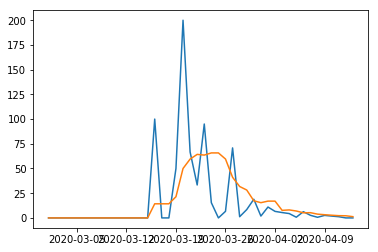

In [651]:
plt.figure()
plt.plot(dfds["date"], dfds["daily_growth_rate"]*100)
plt.plot(dfds["date"], dfds["avg_growth_rate"]*100)

### Growth rate: states

In [401]:
from datetime import timedelta

In [459]:
dfsc = pd.read_csv("../data/extracted_data_api/state_codes.csv")

df = pd.read_csv("../data/extracted_data_api/statewise_daily_confirmed.csv")
df["date"] = pd.to_datetime(df["date"])
dft = df.set_index("date").cumsum().reset_index()
del dft["TT"], dft["Unnamed: 39"]
for col in dft.columns:
    if col not in ["date"]:
        state_name = dfsc[dfsc["state_code"]==col]["state"].values[0]
        dft.rename(columns={col:state_name}, inplace=True)

dft.to_csv("../data/extracted_data_api/code_data/statewise_daily_confirmed.csv", index=False)
dft

,date,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Daman and Diu,Delhi,Dadra and Nagar Haveli,Goa,Gujarat,Himachal Pradesh,Haryana,Jharkhand,Jammu and Kashmir,Karnataka,Kerala,Ladakh,Lakshadweep,Maharashtra,Meghalaya,Manipur,Madhya Pradesh,Mizoram,Nagaland,Odisha,Punjab,Puducherry,Rajasthan,Sikkim,Telangana,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,2020-03-14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,6.0,19.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,12.0,0.0,0.0
1,2020-03-15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,14.0,0.0,1.0,6.0,24.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.0,1.0,0.0,13.0,0.0,0.0
2,2020-03-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,14.0,0.0,1.0,7.0,27.0,0.0,0.0,38.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,4.0,0.0,4.0,1.0,0.0,13.0,1.0,0.0
3,2020-03-17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,15.0,0.0,4.0,9.0,27.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0,5.0,1.0,0.0,15.0,1.0,1.0
4,2020-03-18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,16.0,0.0,4.0,14.0,27.0,8.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,7.0,0.0,13.0,2.0,0.0,17.0,2.0,1.0
5,2020-03-19,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0,0.0,0.0,2.0,0.0,17.0,0.0,4.0,15.0,28.0,8.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,9.0,0.0,16.0,3.0,0.0,20.0,3.0,1.0
6,2020-03-20,0.0,3.0,0.0,0.0,0.0,5.0,1.0,0.0,20.0,0.0,0.0,7.0,2.0,19.0,0.0,4.0,15.0,40.0,10.0,0.0,52.0,0.0,0.0,4.0,0.0,0.0,2.0,3.0,1.0,17.0,0.0,19.0,3.0,0.0,24.0,3.0,2.0
7,2020-03-21,0.0,5.0,0.0,0.0,0.0,5.0,1.0,0.0,27.0,0.0,0.0,14.0,2.0,21.0,0.0,4.0,20.0,52.0,13.0,0.0,64.0,0.0,0.0,4.0,0.0,0.0,2.0,13.0,1.0,24.0,0.0,21.0,6.0,0.0,28.0,3.0,4.0
8,2020-03-22,0.0,6.0,0.0,0.0,2.0,6.0,1.0,0.0,27.0,0.0,0.0,18.0,2.0,21.0,0.0,4.0,26.0,67.0,13.0,0.0,74.0,0.0,0.0,6.0,0.0,0.0,2.0,21.0,1.0,28.0,0.0,27.0,9.0,0.0,30.0,3.0,7.0
9,2020-03-23,0.0,7.0,0.0,0.0,3.0,7.0,1.0,0.0,30.0,0.0,0.0,30.0,3.0,28.0,0.0,4.0,33.0,95.0,13.0,0.0,97.0,0.0,0.0,6.0,0.0,0.0,2.0,23.0,1.0,32.0,0.0,33.0,12.0,0.0,32.0,4.0,7.0


#### States: doubling times

In [467]:
latest_date = dft.iloc[len(dft)-1]["date"]
num_last_days = 7
dft_lastweek = dft[dft["date"]> (latest_date - timedelta(days=num_last_days))]
dft_start_end_lastweek = dft_lastweek.head(1).append(dft_lastweek.tail(1))
dft_start_end_lastweek

dfdr = pd.DataFrame()
idx = 0
dfdr.at[idx, "date"] = dft_lastweek.tail(1)["date"].values[0]
for col in dft_start_end_lastweek:
    if col not in ["date"]:
        #dfdr.at[idx, "state"] = col
        lastweek_start_value = dft_start_end_lastweek[col].values[0]
        lastweek_end_value = dft_start_end_lastweek[col].values[1]
        if ((lastweek_start_value==lastweek_end_value) or (lastweek_start_value==0)):
            #dfdr.at[idx, "current_doubling_days"] = np.nan
            dfdr.at[idx, col] = -1e3
        else:
            num_times_doubled = np.log2( lastweek_end_value / lastweek_start_value )
            #dfdr.at[idx, "current_doubling_days"] = num_last_days / num_times_doubled
            dfdr.at[idx, col] = num_last_days / num_times_doubled
        #idx+=1

In [471]:
df = pd.read_csv("../data/extracted_data_api/code_data/statewise_daily_confirmed.csv")
df = df.append(dfdr)
for col in df.columns:
    df.rename(columns={col:col.replace(" ","-")},inplace=True)
df.to_csv("../data/extracted_data_api/code_data/statewise_daily_confirmed_with_growth_rate.csv", index=False)
df

,date,Andaman-and-Nicobar-Islands,Andhra-Pradesh,Arunachal-Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Daman-and-Diu,Delhi,Dadra-and-Nagar-Haveli,Goa,Gujarat,Himachal-Pradesh,Haryana,Jharkhand,Jammu-and-Kashmir,Karnataka,Kerala,Ladakh,Lakshadweep,Maharashtra,Meghalaya,Manipur,Madhya-Pradesh,Mizoram,Nagaland,Odisha,Punjab,Puducherry,Rajasthan,Sikkim,Telangana,Tamil-Nadu,Tripura,Uttar-Pradesh,Uttarakhand,West-Bengal
0,2020-03-14,0.000000,1.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,7.000000,0.0,0.0,0.000000,0.000000,14.000000,0.000000,0.000000,6.000000,19.000000,0.000000,0.0,14.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,1.000000,0.000000,3.000000,0.0,1.000000,1.000000,0.0,12.000000,0.000000,0.000000
1,2020-03-15,0.000000,1.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,7.000000,0.0,0.0,0.000000,0.000000,14.000000,0.000000,1.000000,6.000000,24.000000,0.000000,0.0,32.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,1.000000,0.000000,4.000000,0.0,3.000000,1.000000,0.0,13.000000,0.000000,0.000000
2,2020-03-16,0.000000,1.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,7.000000,0.0,0.0,0.000000,0.000000,14.000000,0.000000,1.000000,7.000000,27.000000,0.000000,0.0,38.000000,0.0,0.0,NaN,0.0,0.0,1.000000,1.000000,1.000000,4.000000,0.0,4.000000,1.000000,0.0,13.000000,1.000000,0.000000
3,2020-03-17,0.000000,1.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,8.000000,0.0,0.0,0.000000,0.000000,15.000000,0.000000,4.000000,9.000000,27.000000,0.000000,0.0,41.000000,0.0,0.0,0.00000,0.0,0.0,1.000000,1.000000,1.000000,4.000000,0.0,5.000000,1.000000,0.0,15.000000,1.000000,1.000000
4,2020-03-18,0.000000,1.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,10.000000,0.0,0.0,0.000000,0.000000,16.000000,0.000000,4.000000,14.000000,27.000000,8.000000,0.0,44.000000,0.0,0.0,0.00000,0.0,0.0,2.000000,2.000000,1.000000,7.000000,0.0,13.000000,2.000000,0.0,17.000000,2.000000,1.000000
5,2020-03-19,0.000000,3.000000,0.0,0.0000,0.0,1.000000,1.000000,0.0,14.000000,0.0,0.0,2.000000,0.000000,17.000000,0.000000,4.000000,15.000000,28.000000,8.000000,0.0,48.000000,0.0,0.0,0.00000,0.0,0.0,2.000000,2.000000,1.000000,9.000000,0.0,16.000000,3.000000,0.0,20.000000,3.000000,1.000000
6,2020-03-20,0.000000,3.000000,0.0,0.0000,0.0,5.000000,1.000000,0.0,20.000000,0.0,0.0,7.000000,2.000000,19.000000,0.000000,4.000000,15.000000,40.000000,10.000000,0.0,52.000000,0.0,0.0,4.00000,0.0,0.0,2.000000,3.000000,1.000000,17.000000,0.0,19.000000,3.000000,0.0,24.000000,3.000000,2.000000
7,2020-03-21,0.000000,5.000000,0.0,0.0000,0.0,5.000000,1.000000,0.0,27.000000,0.0,0.0,14.000000,2.000000,21.000000,0.000000,4.000000,20.000000,52.000000,13.000000,0.0,64.000000,0.0,0.0,4.00000,0.0,0.0,2.000000,13.000000,1.000000,24.000000,0.0,21.000000,6.000000,0.0,28.000000,3.000000,4.000000
8,2020-03-22,0.000000,6.000000,0.0,0.0000,2.0,6.000000,1.000000,0.0,27.000000,0.0,0.0,18.000000,2.000000,21.000000,0.000000,4.000000,26.000000,67.000000,13.000000,0.0,74.000000,0.0,0.0,6.00000,0.0,0.0,2.000000,21.000000,1.000000,28.000000,0.0,27.000000,9.000000,0.0,30.000000,3.000000,7.000000
9,2020-03-23,0.000000,7.000000,0.0,0.0000,3.0,7.000000,1.000000,0.0,30.000000,0.0,0.0,30.000000,3.000000,28.000000,0.000000,4.000000,33.000000,95.000000,13.000000,0.0,97.000000,0.0,0.0,6.00000,0.0,0.0,2.000000,23.000000,1.000000,32.000000,0.0,33.000000,12.000000,0.0,32.000000,4.000000,7.000000


/Users/nesara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


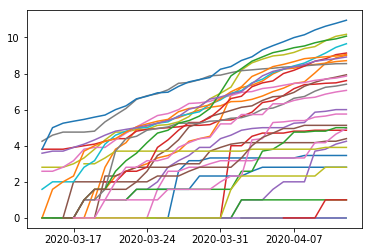

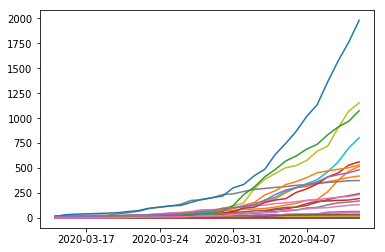

In [392]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for col in dft.columns:
    if col not in ["date", "TT"]:
        ax1.plot(dft["date"], np.log2(dft[col]))
        ax2.plot(dft["date"], dft[col])
        
#ax1.set_yscale('log')
#ax1.set_yticks([1, 4, 16, 64, 256, 1024])

### Table: District wise case, death, growth, case_density

In [1113]:
## Cases, deaths from howIndiaLives (Run this after copying data manually from howIndiaLives)
"""
df = pd.read_csv("../data/extracted_data_api/districtwise.csv")[["district", "state", "cases", "deaths"]]
for i in range(len(df)):
    state_name = df.iloc[i]["state"]
    if state_name in state_name_mapping_howindialives.keys():
        df.at[i, "state"] = state_name_mapping_howindialives[state_name]
df.at[df["district"]=="Kargil", "state"] = "Ladakh"
df.at[df["district"]=="Leh(Ladakh)", "state"] = "Ladakh"
df.to_csv("../data/extracted_data_api/code_data/districtwise_top_hotspots.csv", index=False)
"""

In [1850]:
#min_case_count = 10
is_delhi_combined = 0

######################### Cases, deaths from howIndiaLives ##################
df = pd.read_csv("../data/extracted_data_api/code_data/districtwise_top_hotspots.csv")
if is_delhi_combined==1:
    # ---- Handle Delhi -------- #
    df1 = df[df["state"]=="Delhi"].copy()
    df = df[df["state"]!="Delhi"]
    total_delhi_cases = df1[df1["state"]=="Delhi"]["cases"].sum()
    total_delhi_deaths = df1[df1["state"]=="Delhi"]["deaths"].sum()
    df1.at[df1["district"]=="New Delhi", "district"] = "Delhi"
    df1.at[df1["district"]=="Delhi", "cases"] = total_delhi_cases
    df1.at[df1["district"]=="Delhi", "deaths"] = total_delhi_deaths
    df1 = df1[(df1["state"]=="Delhi") & (df1["district"]=="Delhi")]
    df = df.append(df1)

################## Case Growth rate from raw data of covid19.org ###########
dfcc = pd.read_csv("../data/extracted_data_api/code_data/districtwise_current_growth_rate_all_withDistrictNameMapped.csv")
#df = df.set_index("district").join(dfcc[["district","current_avg_growth_rate"]].set_index("district"), how="left").reset_index()
del dfcc["state"], dfcc["total_cases"]
df = df.set_index("district").join(dfcc.set_index("district"), how="left").reset_index()


################# Population from wiki scraping ############################
dfwdp = pd.read_csv("../data/wiki_scrape/district_population_wiki_withNameMapped.csv")
if is_delhi_combined==1:
    # ---- Handle Delhi -------- #
    df1 = dfwdp[dfwdp["state"]=="Delhi"].copy()
    dfwdp = dfwdp[dfwdp["state"]!="Delhi"]
    total_delhi_population = df1[df1["state"]=="Delhi"]["population"].sum()
    total_delhi_area = df1[df1["state"]=="Delhi"]["area"].sum()
    df1.at[df1["district"]=="New Delhi", "district"] = "Delhi"
    df1.at[df1["district"]=="Delhi", "population"] = total_delhi_population
    df1.at[df1["district"]=="Delhi", "area"] = total_delhi_area
    df1 = df1[(df1["state"]=="Delhi") & (df1["district"]=="Delhi")]
    dfwdp = dfwdp.append(df1)
dfwdp.drop_duplicates(["district", "state"], inplace=True)
df = df.set_index(["district","state"]).join(dfwdp[["district", "state", "population", "state_code"]].set_index(["district","state"]), how="inner").reset_index()
df["cases_per_lakh"] = np.round(df["cases"]/df["population"] * 100000,0)

if is_delhi_combined==1:
    df.to_csv("../data/extracted_data_api/code_data/districtwise_case_death_growth_density_withDelhiCombined.csv", index=False)
else:
    df.to_csv("../data/extracted_data_api/code_data/districtwise_case_death_growth_density_withDelhiSeparate.csv", index=False)

#df.to_csv("../data/extracted_data_api/code_data/districtwise_case_death_growth_density_withNamesMapped.csv", index=False)
#df = df[df["cases"]>=min_case_count]
#df.to_csv("../data/extracted_data_api/code_data/districtwise_case_death_growth_density_withNamesMapped_minCaseCount.csv", index=False)
df

,district,state,cases,deaths,current_avg_growth_rate,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,day11,day12,day13,day14,population,state_code,cases_per_lakh
0,Adilabad,Telangana,11,0,71.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.43,71.43,708952.0,TS,2.0
1,Agar Malwa,Madhya Pradesh,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MP,NaN
2,Agra,Uttar Pradesh,90,0,16.67,1.43,1.43,2.73,8.68,11.20,28.34,29.32,28.50,32.29,31.45,29.74,28.08,11.58,12.47,16.67,4380793.0,UP,2.0
3,Ahmadabad,Gujarat,266,9,27.48,7.10,7.75,12.72,12.72,15.95,15.52,14.70,16.98,20.57,15.60,25.76,28.07,28.77,28.52,27.48,7208200.0,GJ,4.0
4,Ahmadnagar,Maharashtra,29,0,1.81,16.67,18.10,18.10,34.17,34.17,34.17,28.00,29.36,22.04,22.04,5.96,5.96,6.54,3.17,1.81,4543083.0,MH,1.0
5,Aizawl,Mizoram,2,0,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,404054.0,MZ,0.0
6,Ajmer,Rajasthan,5,0,0.00,NaN,NaN,NaN,NaN,NaN,46.43,3.57,3.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2584913.0,RJ,0.0
7,Akola,Maharashtra,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818617.0,MH,1.0
8,Alappuzha,Kerala,5,0,9.52,14.29,0.00,0.00,0.00,0.00,7.14,7.14,7.14,7.14,16.67,16.67,16.67,9.52,9.52,9.52,2121943.0,KL,0.0
9,Aligarh,Uttar Pradesh,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3673849.0,UP,0.0


# One time code

#### Mapping wiki district names

In [1210]:
## Cases, deaths
df = pd.read_csv("../data/extracted_data_api/code_data/districtwise_top_hotspots.csv")
dfwdp = pd.read_csv("../data/wiki_scrape/district_population_wiki.csv") 
state_list = dfwdp["state"].unique()

for sid in range(len(state_list)):
    state_name = state_list[sid]
    print("===" + state_name + "===")
    district_list = dfwdp[dfwdp["state"]==state_name]["district"].unique()
    
    for did in range(len(district_list)):

        district_name = district_list[did]
        #district_data = df[df["district"]==district_name]
        if district_name in district_name_wiki_mapping.keys():
            district_name_mapped = district_name_wiki_mapping[district_name]
            dfwdp.at[dfwdp["district"]==district_name, "district"] = district_name_mapped
            district_name = district_name_mapped

        if district_name in district_name_mapping.keys():
            district_name_mapped = district_name_mapping[district_name]
            dfwdp.at[dfwdp["district"]==district_name, "district"] = district_name_mapped
            district_name = district_name_mapped

        if district_name in district_name_resolution:
            district_name_resolved = resolve_district_name(state_name, district_name)
            dfwdp.at[(dfwdp["district"]==district_name) & (dfwdp["state"]==state_name), "district"] = district_name_resolved
            district_name = district_name_resolved
         
        if district_name in district_name_unmapped:
            continue
        else:
            district_data = df[df["district"]==district_name]

            if len(district_data)==0:
                print(district_name + " Data not found")
            elif len(district_data)>1:
                print(district_name + " More than one Data not found")
            elif len(district_data)==1:
                a = 1;
            else:
                print(district_name + " Other error")
dfwdp.to_csv("../data/wiki_scrape/district_population_wiki_withNameMapped.csv", index=False) 

===Andhra Pradesh===
===Arunachal Pradesh===
===Assam===
===Bihar===
===Chhattisgarh===
===Goa===
===Gujarat===
===Haryana===
===Himachal Pradesh===
===Jharkhand===
===Karnataka===
===Kerala===
===Madhya Pradesh===
===Maharashtra===
===Manipur===
===Meghalaya===
===Mizoram===
===Nagaland===
===Odisha===
===Punjab===
===Rajasthan===
===Sikkim===
===Tamil Nadu===
===Telangana===
===Tripura===
===Uttar Pradesh===
===Uttarakhand===
===West Bengal===
===Andaman and Nicobar Islands===
===Chandigarh===
===Dadra and Nagar Haveli===
===Jammu and Kashmir===
===Ladakh===
===Lakshadweep===
===Delhi===
===Puducherry===


In [1211]:
## Reformat numbers
dfwdp = pd.read_csv("../data/wiki_scrape/district_population_wiki_withNameMapped.csv")
for i in range(len(dfwdp)):
    try:
        population = int(dfwdp.iloc[i]["population"].replace(",",""))
    except:
        population = np.nan
    dfwdp.at[i, "population"] = population
    
    try:
        area = float(dfwdp.iloc[i]["area"].replace(",",""))
    except:
        area = np.nan
    dfwdp.at[i, "area"] = area
dfwdp.drop_duplicates(["district", "state"], inplace=True)
dfwdp.to_csv("../data/wiki_scrape/district_population_wiki_withNameMapped.csv", index=False)

#### Get districtwise population: Scraping wikipedia page

In [1031]:
url = "https://en.wikipedia.org/wiki/List_of_districts_in_India"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'xml')

In [1032]:
wiki_state_mapping = {"Andaman and Nicobar":"Andaman and Nicobar Islands",
                      "Dadra and Nagar Haveli and Daman and Diu": "Dadra and Nagar Haveli",
                      "National Capital Territory of Delhi": "Delhi"}

state_headings = soup.findAll("h3")[:36]
df_statecode_wiki = pd.DataFrame()
idx = 0
for shid in range(len(state_headings)):
    state_name = state_headings[shid].text.split("[edit]")[0].split(" (")[0]
    if state_name in wiki_state_mapping.keys():
        state_name = wiki_state_mapping[state_name]
    df_statecode_wiki.at[idx, "state"] = state_name
    df_statecode_wiki.at[idx, "state_code"] = state_headings[shid].text.split("[edit]")[0].split(" (")[1].split(")")[0]
    idx+=1
df_statecode_wiki.to_csv("../data/wiki_scrape/state_codes_wiki.csv", index=False)

In [1033]:
idx = 0
df = pd.DataFrame()

all_state_tables = soup.findAll("table")[3:39]
for state_table_id in range(len(all_state_tables)):
    state_table = all_state_tables[state_table_id]
    
    state_name = df_statecode_wiki.iloc[state_table_id]["state"]
    state_code = df_statecode_wiki.iloc[state_table_id]["state_code"]
    
    state_district_list = all_state_tables[state_table_id].findAll("tr")[1:] 
    for state_table_row_id in range(len(state_district_list)):
        
        district_row = state_district_list[state_table_row_id].findAll("td")
        df.at[idx, "district"] = district_row[2].text.split("[")[0]
        df.at[idx, "district_code"] = district_row[1].text
        df.at[idx, "population"] = district_row[4].text.split("[")[0]
        df.at[idx, "state"] = state_name
        df.at[idx, "state_code"] = state_code
        df.at[idx, "headquarters"] = district_row[3].text
        df.at[idx, "area"] = district_row[5].text.split("[")[0]
        df.at[idx, "density"] = district_row[6].text.split("[")[0].split("\n")[0]
        
        idx+=1
df.to_csv("../data/wiki_scrape/district_population_wiki.csv", index=False)

In [1047]:
df = pd.read_csv("../data/wiki_scrape/district_population_wiki.csv")
df[df["district"]=="Adilabad"]

,district,district_code,population,state,state_code,headquarters,area,density
539,Adilabad,AD,"708,952",Telangana,TS,Adilabad,"4,185.97",171


###### Debug

In [133]:
for i in range(len(df)):
    tmst = df.loc[i]["timeto"]
    print("--------")
    print(str(i) + " " + tmst)
    
    tmst_split = tmst.split(" ")
    tmst_date = tmst_split[0].replace("03/082020", "03/08/2020").replace(":","/").replace(".","/")
    tmst_time = ""
    tmst_ampm = ""

    if len(tmst_split)>=2:
        tmst_time = tmst_split[1].replace(".",":")
        if len(tmst_split)==3:
            tmst_ampm = tmst_split[2]

    tmst_processed = tmst_date + " " + tmst_time + " " + tmst_ampm
    print(str(i) + " " + tmst_processed)
    pd.to_datetime(tmst_processed)

--------
0 29/02/2020 11:30:00 
0 29/02/2020 11:30:00 
--------
1 01/03/2020 23:00:00 
1 01/03/2020 23:00:00 
--------
2 02/03/2020 11:30:00 
2 02/03/2020 11:30:00 
--------
3 02/03/2020 12:00:00 
3 02/03/2020 12:00:00 
--------
4 02/03/2020 13:00:00 
4 02/03/2020 13:00:00 
--------
5 02/03/2020 14:00:00 
5 02/03/2020 14:00:00 
--------
6   
6   


ValueError: ('String does not contain a date:', '  ')

In [137]:
len(tmst.strip())

0

In [ ]:


district_name_mapping = {"Jagitial":"Jagtial", "Jangoan":"Jangaon", "Kumuram Bheem Asifabad":"Komaram Bheem Asifabad",
                         "Mahabubnagar": "Mahbubnagar", "Ranga Reddy": "Rangareddy", "Yadadri Bhuvanagiri":"Yadadri Bhongir",
                         "Jayashankar": "Jayashankar Bhupalapally",
                         "West Khasi Hills":"West khasi Hills", "East Jaintia Hills":"East Jainta Hills",
                        "Kalaburagi":"Gulbarga", "Belagavi":"Belgaum", "Bagalkote":"Bagalkot", "Ballari":"Bellary",
                        "Shivamogga":"Shimoga", "Chikkamagaluru":"Chikmagalur", "Bengaluru Rural":"Bangalore Rural",
                        "Bengaluru":"Bangalore", "Chamarajanagara":"Chamarajanagar", "Tumakuru":"Tumkur", "Mysuru":"Mysore","Vijayapura":"Bijapur",
                        "Gurugram":"Gurgaon", "Mahendragarh":"Narnaul","Charki Dadri":"Ch-Dadri",
                        "West Champaran": "Pashchim Champaran", "East Champaran":"Purba Champaran", "Kaimur Bhabhua":"Kaimur (Bhabua)",
                        "S.P.S. Nellore":"Nellore", "Chittoor":"chittoor",
                        "South 24 Parganas":"South Twenty Four Parganas", "Medinipur West":"Paschim Medinipur", "Medinipur East":"Purba Medinipur",
                        "Darjeeling":"Darjiling", "Purulia":"Puruliya", "North 24 Parganas":"North Twenty Four Parganas", "Hooghly":"Hugli",
                        "Howrah":"Haora", "Cooch Behar":"Koch Bihar",
                        "Gariaband":"Gariyaband", "Kabeerdham":"Kawardha", "Janjgir Champa":"Janjgir - Champa", "Bametara":"Bemetara",
                        "Baloda Bazar":"Balodabazar",
                        "North and Middle Andaman":"North & Middle Andman", "South Andaman":"South Andman","Nicobars":"Nicobar",
                        "Saraikela-kharsawan":"Saraikela-Kharsawan",
                        "Leh":"Leh(Ladakh)",
                        "Amroha":"J P Nagar (Amroha)", "Kheri":"Lakhimpur Kheri", "Kasganj":"Kanshiram Nagar", "Prayagraj":"Allahabad",
                        "Bhadohi":"Sant Ravidas Nagar (Bhadohi)", "Amethi":"C S M Nagar (Amethi)",
                        "Thoothukudi":"Thoothukkudi","Dadra and Nagar Haveli":"Uni District UT", 
                        "Khargone":"Khargone (West Nimar)", "Khandwa":"Khandwa (East Nimar)", "Ashoknagar":"Ashok Nagar",
                        "Kra Daadi":"Kra daadi", "Lower Dibang Valley":"Lower Dibang valley", "Upper Dibang Valley":"Dibang Valley",
                        "Haridwar":"Hardwar", "Noney":"None", "Pherzawl":"Pherjawl", "Sipahijala":"Sepahijala District","Gomati":"Gomati District",
                        "Khowai":"Khowai District", "Unokoti":"Unakoti District", "The Dangs":"Dang", "Chota Udaipur":"Chhota Udepur",
                        "Aravalli":"Arvalli",
                        "S.A.S. Nagar":"Mohali", "Sri Muktsar Sahib":"Muktsar",
                        "Jhunjhunu":"Jhunjhunun", "Lahul and Spiti":"Lahul & Spiti","North  District":"North District"
                        }


district_name_resolution = ["Aurangabad", "Bijapur", "Raigarh", "Bilaspur", "Balrampur", "Hamirpur", "Pratapgarh"]

In [ ]:
"""
## From how india lives (Cases, deaths)
df = pd.read_csv("../data/extracted_data_api/districtwise.csv")
## From raw data of covid19.org (Growth rate)
dfcc = pd.read_csv("../data/extracted_data_api/code_data/districtwise_current_growth_rate_all_withDistrictNameMapped.csv")

state_name_list = []

for fp in os.listdir("../data/state_geojson_raw/"):
    if not fp.startswith(".") and fp.endswith(".json"):
        state_name = fp.split(".")[0]
        state_name_mapped = state_name_mapping[state_name]
        state_name_list.append(state_name)
        print(state_name)

        with open("../data/state_geojson_raw/"+fp) as topodata:
            raw_data = json.load(topodata)

        data = raw_data
        district_list = data["objects"][state_name+"_district"]["geometries"]
        
        if state_name=="tamilnadu":
            data["transform"]["scale"] = [0.0006973698971092601, 0.0006462543480830687]
            data["transform"]["translate"] = [76.20310065122152, 8.107847033856163]
        
        for i in range(len(district_list)):
            district_name = data["objects"][state_name+"_district"]["geometries"][i]["properties"]["district"]
            if district_name in district_name_mapping:
                district_name_mapped = district_name_mapping[district_name]
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["district"] = district_name_mapped
                district_name = district_name_mapped
                
            if district_name in district_name_resolution:
                district_name_resolved = resolve_district_name(state_name, district_name)
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["district"] = district_name_resolved
                district_name = district_name_resolved
                
            ## District name not found
            if district_name in district_name_unmapped:
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["cases"] = str(-1)
                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["deaths"] = str(-1)
            else:
                df_district = df[df["district"]==district_name].copy()

                if len(df_district)==1:
                    data["objects"][state_name+"_district"]["geometries"][i]["properties"]["cases"] = str(df_district["cases"].values[0])
                    data["objects"][state_name+"_district"]["geometries"][i]["properties"]["deaths"] = str(df_district["deaths"].values[0])
                elif len(df_district)==0:
                    print(district_name + " data not found")
                elif len(df_district)>1:
                    print(district_name + " more than one data found")
                else:
                    print(district_name + " other error")
                    
                
                df_district = dfcc[dfcc["district"]==district_name].copy()

                data["objects"][state_name+"_district"]["geometries"][i]["properties"]["current_case_growth_rate"] = np.nan
                if len(df_district)==1:
                    data["objects"][state_name+"_district"]["geometries"][i]["properties"]["current_case_growth_rate"] = str(df_district["current_avg_growth_rate"].values[0])
                elif len(df_district)==0:
                    print("Growth rate: " + district_name + " data not found")
                elif len(df_district)>1:
                    print("Growth rate: " + district_name + " more than one data found")
                else:
                    print("Growth rate: " + district_name + " other error")
                    
                    
        #with open('../data/extracted_data_api/code_data/state_geojson_data_howIndiaLives/'+state_name+'.json', 'w') as outfile:
            #json.dump(data, outfile)
        #with open('../data/extracted_data_api/code_data/india_districtwise_map_case_death_growth/'+state_name+'.json', 'w') as outfile:
        #    json.dump(data, outfile)
"""
print("Old code")